# Bibliotecas

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## DECLARA SIMBOLOS

In [2]:
x1, L, E, I1, I2, P, C1, C2, C3, C4, C5, C6, C7, C8 = sym.symbols('x1 L E I1 I2 P C1 C2 C3 C4 C5 C6 C7 C8')

## POLINOMIOS DE 3º GRAU

In [3]:
y1 = C1 + C2*x1 + C3*x1**2 + C4*x1**3

## APLICA CONDIÇÃO DE CONTORNO y(0) = 0 PARA OBTER C1

In [4]:
C1_ = sym.solve(y1.subs(x1,0), C1)[0]
y1 = y1.subs(C1,C1_)

## APLICA CONDIÇÃO DE CONTORNO y(L) = 0 PARA OBTER C2

In [5]:
C2_ = sym.solve(y1.subs(x1,L),C2)[0]
y1 = y1.subs(C2,C2_)

## SEGUNDA DERIVADA DE y

In [6]:
ddy1 = y1.diff(x1,x1)

## ENERGIA

In [7]:
en = sym.integrate((E*I1*ddy1**2)/2, (x1, 0, L/2)) + sym.integrate((E*I2*ddy1**2)/2, (x1, L/2, L)) - P*y1.subs(x1,L/2)

## RESOLVER SISTEMA PARA ENCONTRAR C3 E C4

In [8]:
C3_, C4_ = sym.solve((en.diff(C3), en.diff(C4)), C3, C4).values()

## EQUAÇÃO DA LINHA ELASTICA FINAL

In [9]:
y1 = y1.subs([(C3,C3_), (C4,C4_)]).simplify()
y1

P*x1*(L**2*(I1 + 3*I2) + L*x1*(I1 - 5*I2) - 2*x1**2*(I1 - I2))/(4*E*(I1**2 + 14*I1*I2 + I2**2))

## VALIDA SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS

In [10]:
print("y(0) = 0: ", y1.subs(x1,0).simplify() == 0)
print("y(L) = 0: ", y1.subs(x1,L).simplify() == 0)

y(0) = 0:  True
y(L) = 0:  True


## PLOT

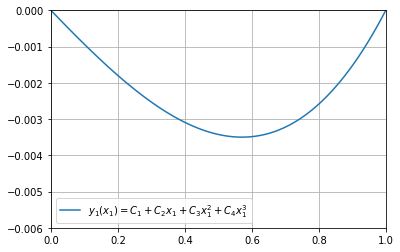

In [11]:
x_range = np.arange(0.0, 1.01, 0.01)
x_1 = list()
y_1 = list()

for i in x_range:
    value = y1.subs([(x1, i), (E,5), (L,1), (I1,200), (I2, 50), (P,-100)])
    x_1.append(i)
    y_1.append(value)

plt.xlim([0, 1])
plt.ylim([-0.006, 0])
plt.plot(x_1, y_1)
plt.legend(["$y_1(x_1) = C_{1} + C_{2} x_{1} + C_{3} x_{1}^{2} + C_{4} x_{1}^{3}$"])
plt.grid()